<a href="https://colab.research.google.com/github/rasminair/amazon-product-review-analysis/blob/main/Proj_Amazone_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem: Classifying Topics in Amazon Product Reviews<br>
**Objective:** Amazon has a large volume of customer reviews for various products. These reviews contain valuable information about customer experiences, which can be useful for improving product search and providing better recommendations. However the massive volume of data makes it challenging to manually extract the main topics from the reviews. The goal is to create a Topic Modeling model that automatically identifies the main topics within the product reviews.

In [ ]:
# Analysis 1 - Step 1: Install a module: vaderSentiment - sentiment analysis
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.8 MB/s eta 0:00:00


In [ ]:
 # Step 1: Import necessary libraries
import pandas as pd # assess dataset
import numpy as np # numerical python
import matplotlib.pyplot as plt # Data visualization graph
import seaborn as sns # Advanced visualization, analysis and more interactive graphs
from nltk.tokenize import word_tokenize # Converts the sentences into words and simplify to its basic form
from nltk.corpus import stopwords # common words in English which are common to all sentences
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment intensity analyzer
from wordcloud import WordCloud # Visualization while analyzing sentences
from collections import Counter # To count the words
import nltk # Natural language Toolkit - module in Python for processing the language
import re
import string

In [ ]:
nltk.download('punkt') # Breaksdown sentences to words
nltk.download('stopwords') # Copy locally to match
sns.set(style='whitegrid') # graphs will have a white grid

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/amazon_reviews.csv')

In [ ]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
df.shape

(1597, 27)

In [ ]:
# Pre processing: Drop missing reviews
df = df.dropna(subset=['reviews.text'])
df = df.reset_index(drop=True)

In [ ]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [ ]:
df.shape

(1597, 27)

In [ ]:
from nltk.sem.evaluate import textwrap
# Creating a set of stopwords in English to remove
stop_words = set(stopwords.words('english'))
# Creating a function to remove everything other than words
def clean_text(text):
  text = str(text).lower() # Convert to lower case
  # 're.sub' is substituting the 'https' and other characters mentioned with a space
  text = re.sub(r"https\S+|www\S+|https\S+", '', text)
  text = re.sub(r'\[.*?\]\(.*?\)', '', text)
  text = re.sub(r'@\w+', '', text)
  textwrap = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [ ]:
# Create object 'analyzer' to give a score
analyzer = SentimentIntensityAnalyzer()
# Creating a new column called 'cleaned' to save the cleaned reviews from the 'clean_text' function
df['cleaned'] = df['reviews.text'].apply(clean_text)
# Lambda is a small function counts the number of words present in 'x', each 'cleaned' reviews for review length
df['review_length'] = df['cleaned'].apply(lambda x: len(x.split()))
# 'polarity_score' is the score given while running the SentimentAnalysis. This score will be displayed in a seperate column called 'compound'
df['compound'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [ ]:
# Create a function to show the score given by SentimentAnalyzer to classify the review is positive or negative or nutral
def classify_sentiment(score):
  if score >= 0.05: return 'Positive'
  elif score <= -0.05: return 'Negative'
  return 'Neutral'
# Compound has the score, and create a seperate column called classify_sentiment
df['sentiment']= df['compound'].apply(classify_sentiment)
# Show the newly created columns, 'cleaned', 'compound' and 'sentiment'
df[['cleaned', 'compound', 'sentiment']].head()

,cleaned,compound,sentiment
0,i initially had trouble deciding between the p...,0.9882,Positive
1,allow me to preface this with a little history...,0.9886,Positive
2,i am enjoying it so far. great for reading. ha...,0.4364,Positive
3,i bought one of the first paperwhites and have...,0.9755,Positive
4,i have to say upfront - i don't like coroporat...,0.9980,Positive


In [ ]:
# iloc function helps to display any of the particular cell
df.iloc[0]['cleaned']

"i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.fortunately, i had friends who owned each, so i ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).it's been a week and i am loving my paperwhite, no regrets! the touch screen is receptive and easy to use, and i keep the light at a specific setting regardless of the time of day. (in any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).also glad that i went for the international shipping option with amazon. extra expense, but delivery was on time, with tracking, and i didnt need to worry about cu

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

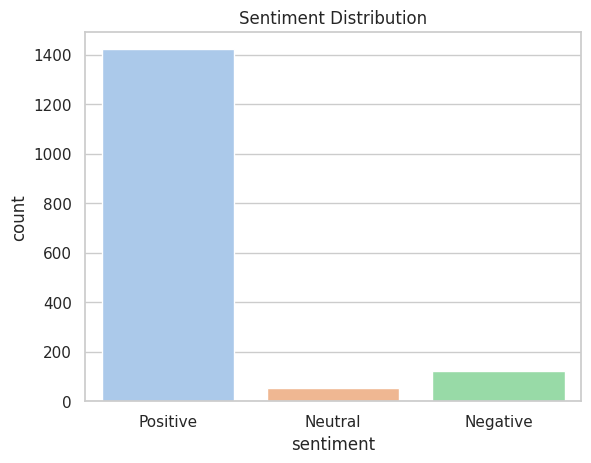

In [ ]:
# Data visualization
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='pastel', legend=False)
plt.title('Sentiment Distribution')
plt.show()

**Positive Sentiment Dominance:** - The overwhelming majority of reviews are classified as Positive (1,421 counts). This suggests that customers are generally satisfied or expressing favorable opinions in the reviews.

<b>Neutral Sentiment: </b>- There is a significantly lower number of reviews classified as Neutral (54 counts). This means that few reviews are neither strongly positive nor negative, showing a lack of middle-ground feedback.

<b>Negative Sentiment: </b>- A small portion of reviews is classified as Negative (122 counts). While fewer than positive reviews, this indicates that some customers are sharing dissatisfaction or negative experiences.

<b>Improvements in Balance:</b> - If the dataset aims to represent a balanced sentiment analysis, it might be necessary to gather or balance more negative or neutral reviews to avoid the positive sentiment dominance. Alternatively, such an imbalance could be a reflection of a generally positive customer experience.

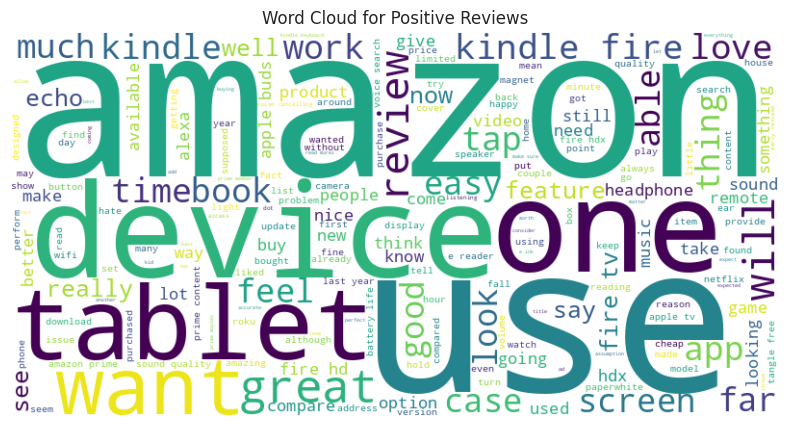

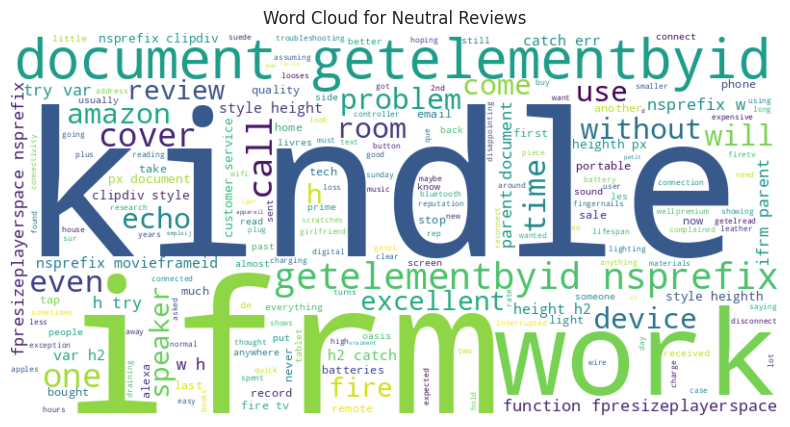

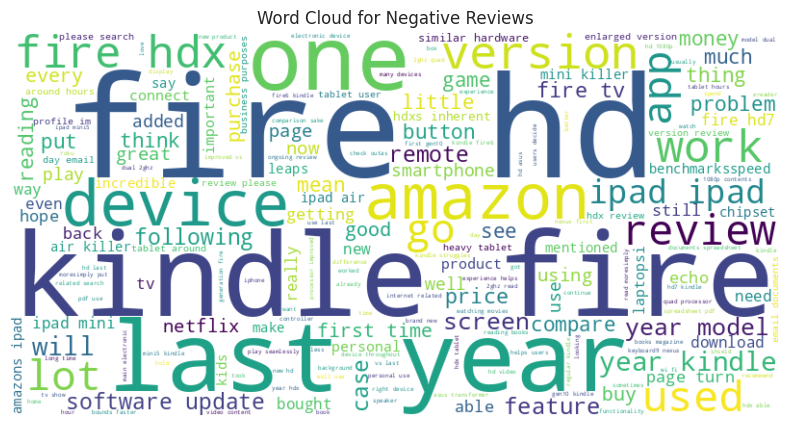

In [ ]:
# Analysis 2 - Generate word cloud - Visualization of how many words available in each review and which is the largest
for sentiment in ['Positive', 'Neutral', 'Negative']:
  text = "".join(df[df['sentiment']==sentiment]['cleaned'])

  if text.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

✅ **Business Inference:**
### 🟥 Inference – Negative Reviews Word Cloud

- Specific product models (`fire`, `kindle`, `hdx`) appear frequently – potential pain points.
- Common issues include functionality (`button`, `remote`, `screen`) and outdated versions.
- Mentions of `price` and competitors like `iPad` suggest value concerns and feature gaps.

> **Insight:** Prioritize fixes for device usability and reconsider pricing or feature parity.

### 🟦 Inference – Neutral Reviews Word Cloud

- Neutral tone words like `work`, `even`, `use`, `one` dominate — reviews are factual, not emotional.
- Frequent mentions of `call`, `cover`, `echo`, and `speaker` suggest mixed experiences with accessories and smart features.
- Terms like `problem` and `without` hint at minor limitations, but not deal-breakers.

> **Insight:** Neutral reviews reflect usability feedback — use this data to improve accessory performance and reduce small friction points.

### 🟩 Inference – Positive Reviews Word Cloud

- Strong positive sentiment around `amazon`, `use`, `love`, `tablet`, and `device` — highlighting satisfaction with usability and brand trust.
- Words like `great`, `easy`, `want`, `good`, `feature` signal delight with experience and value.
- Mentions of `alexa`, `app`, `music`, `screen` show that multimedia and smart features are well-received.

> **Insight:** Double down on ease-of-use and multimedia features in marketing — these are driving positive sentiment and brand loyalty.






In [ ]:
# Analysis 3 - Creating Bar Plots - Which are the top words used in the reviews
# Natural language Toolkit - module in Python for processing the language
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenization - Breaking of large sentences into smaller words and simplifying it
def preprocess_tokens(text):
  tokens = word_tokenize(text)
  # Applying the token in the words and 'isalpha' is a real word and not in stop_words
  return [word for word in tokens if word.isalpha() and word not in stop_words]

# Apply to each review
df['tokens']=df['cleaned'].apply(preprocess_tokens)

In [ ]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.userProvince,reviews.username,sizes,upc,weight,cleaned,review_length,compound,sentiment,tokens
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Cristina M,NaN,NaN,205 grams,i initially had trouble deciding between the p...,193,0.9882,Positive,"[initially, trouble, deciding, paperwhite, voy..."
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Ricky,NaN,NaN,205 grams,allow me to preface this with a little history...,272,0.9886,Positive,"[allow, preface, little, history, casual, read..."
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Tedd Gardiner,NaN,NaN,205 grams,i am enjoying it so far. great for reading. ha...,35,0.4364,Positive,"[enjoying, far, great, reading, original, fire..."
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Dougal,NaN,NaN,205 grams,i bought one of the first paperwhites and have...,310,0.9755,Positive,"[bought, one, first, paperwhites, pleased, con..."
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,NaN,Miljan David Tanic,NaN,NaN,205 grams,i have to say upfront - i don't like coroporat...,352,0.9980,Positive,"[say, upfront, like, coroporate, hermetically,..."


In [ ]:
df.iloc[0]['tokens']

['initially',
 'trouble',
 'deciding',
 'paperwhite',
 'voyage',
 'reviews',
 'less',
 'said',
 'thing',
 'paperwhite',
 'great',
 'spending',
 'money',
 'go',
 'friends',
 'owned',
 'ended',
 'buying',
 'paperwhite',
 'basis',
 'models',
 'ppi',
 'dollar',
 'jump',
 'turns',
 'pricey',
 'voyage',
 'page',
 'press',
 'always',
 'sensitive',
 'fine',
 'specific',
 'setting',
 'need',
 'auto',
 'light',
 'adjustment',
 'week',
 'loving',
 'paperwhite',
 'regrets',
 'touch',
 'screen',
 'receptive',
 'easy',
 'use',
 'keep',
 'light',
 'specific',
 'setting',
 'regardless',
 'time',
 'day',
 'case',
 'hard',
 'change',
 'setting',
 'either',
 'changing',
 'light',
 'level',
 'certain',
 'time',
 'day',
 'every',
 'reading',
 'glad',
 'went',
 'international',
 'shipping',
 'option',
 'amazon',
 'extra',
 'expense',
 'delivery',
 'time',
 'tracking',
 'didnt',
 'need',
 'worry',
 'customs',
 'may',
 'used',
 'third',
 'party',
 'shipping',
 'service']

In [ ]:
# Horizontal Barplots
def plot_top_words_horizontal(tokens, sentiment, color):
  all_words = [word for sublist in tokens for word in sublist] # Taking all of the words from sublist
  common_words = Counter(all_words).most_common(20) # Using Counter library here to find most common, top 20 words
  print(f"Top words for {sentiment} reviews:", common_words) # Print the top words
  if common_words:
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,6))
    sns.barplot(y=list(words), x=list(counts), palette=color)
    plt.title(f"Top Words in {sentiment} Reviews")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

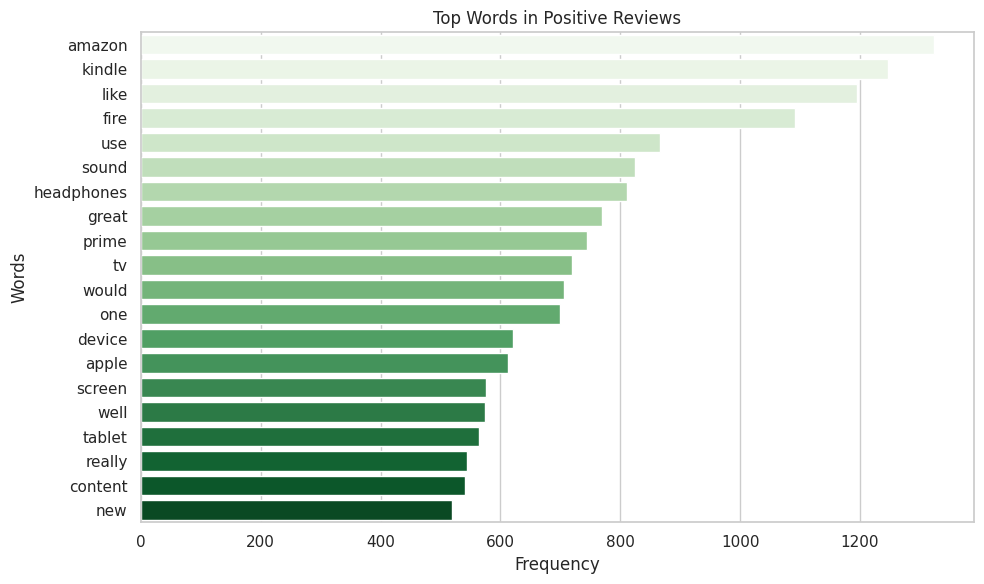

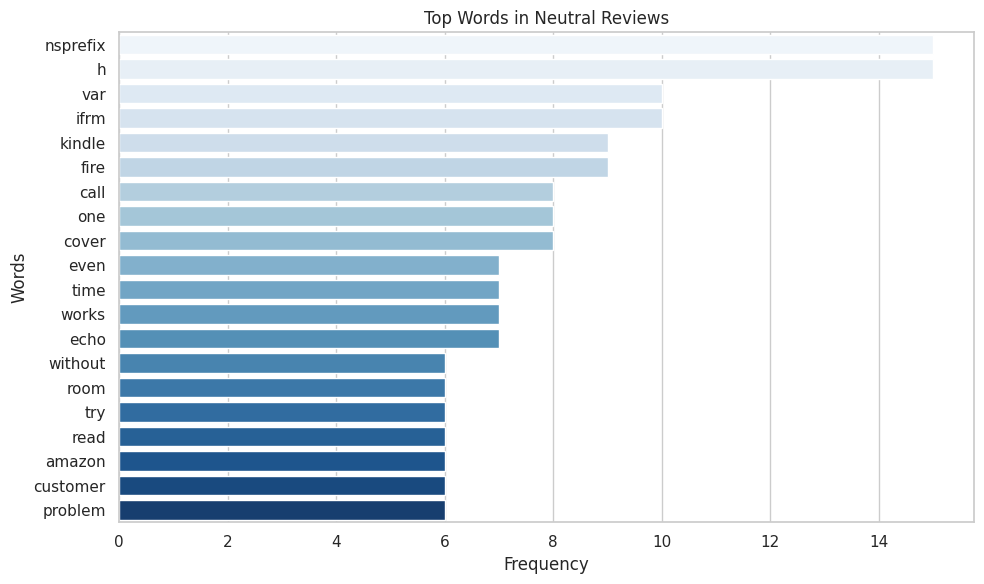

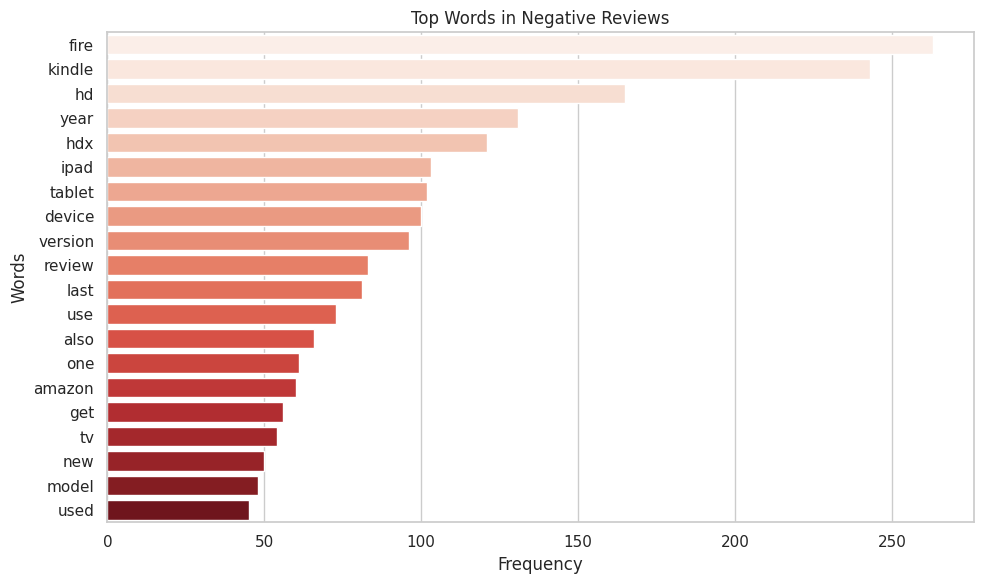

In [ ]:
# Generate plots, 'Zip' to iterate together
for sentiment, color in zip(['Positive', 'Neutral', 'Negative'], ['Greens', 'Blues', 'Reds']):#Positive-Green,Neutral-Blue, Negative-Red
  subset = df[df['sentiment']==sentiment] #Take the number of reviews
  plot_top_words_horizontal(subset['tokens'], sentiment, color) # Count the number of words and take top 20 words
  plt.show()

🟩 **Inference – Positive Reviews**
*  Focus on Strengths: The most frequent words in positive reviews likely highlight what customers love about the products. These could be features, performance aspects, ease of use, or value.
*  Identify Key Selling Points: These top words are essentially the key selling points from the customer's perspective. This information is invaluable for marketing campaigns and product descriptions.
*  Reinforce Positive Experiences: Understanding what makes customers happy allows the business to ensure these positive experiences are consistently delivered and potentially enhanced.

🟦 **Inference – Neutral Reviews**
* Usability and Functionality Insights: Neutral reviews often contain objective observations about how the product works, its features, and its limitations without strong emotional language. The top words in this category might reveal common use cases, expected functionalities, or minor points of friction.
* Identify Areas for Improvement (Subtle): While not expressing dissatisfaction, neutral reviews can point to areas where the product could be more intuitive, have clearer instructions, or offer slightly better performance.
* Understand the "Typical" Experience: The words here can help define the baseline customer experience.

🟥 **Inference – Negative Reviews**
* Pinpoint Pain Points: The most frequent words in negative reviews directly indicate what customers are unhappy about. These could be related to bugs, missing features, poor performance, customer service issues, or product defects.
* Prioritize Bug Fixes and Feature Development: The frequency of certain words can help prioritize which issues need immediate attention and which features are most missed.
* Improve Communication and Support: If words related to support or documentation appear frequently, it suggests a need to improve these areas.<br>
**Note:** Remember to look at the specific words in your generated bar charts to make the most accurate and relevant inferences for your specific product reviews!
